# ENCS5141 Intelligent Systems Lab - Assignment #1

- Libraries used:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pointbiserialr

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import mutual_info_classif

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import time
import torch
import psutil
import os

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

# Displaying the dataset:  

In [2]:
df = pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\AI Lab\data.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Part 1: Data Cleaning and Feature Engineering for the attached Dataset Objectives:

The first part of this study focuses on preparing a real-world dataset for classification tasks. This involves exploring the dataset, identifying and handling missing values, encoding categorical variables, and normalizing numerical features. These steps play a vital role in cleaning up the data, reducing noise and bias, and helping machine learning models learn more accurately and effectively.

Feature selection and dimensionality reduction techniques such as Principal Component Analysis (PCA) are applied to improve computational efficiency and remove redundant or irrelevant information. The effects of these preprocessing techniques are evaluated by comparing the performance of a Random Forest classifier trained on raw data versus the preprocessed data using standard metrics such as accuracy, precision, recall, F1-score, memory usage, and training time.

# 1.1. Data Exploration

In this section, we explored the dataset to understand its structure and how the features are related. It presents the main statistics and correlations found in the data.

- After reviewing all the column names and their data types, everything appears to be correct, as displayed in the cell bellow:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Basic stats for numerical columns:

In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Note that Age ranges from 17 to 90, with most individuals between 28 and 48 years old. Educational levels are concentrated around mid to high school. Capital gain and loss are highly skewed, with most values being zero and a few extreme outliers. Hours per week centers around 40, indicating full-time work is common.

- correlation analysis:

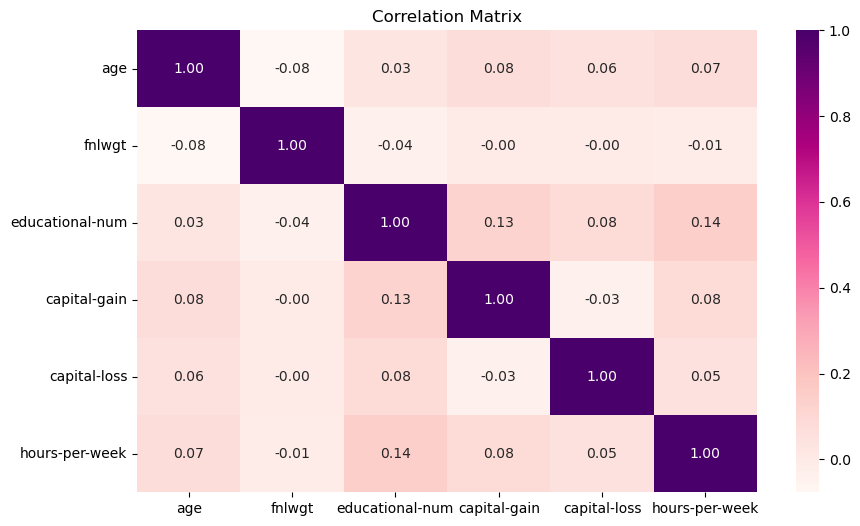

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

- Interpretation of Correlations:

Positive Weak Correlations:
    
    1. age and education-num (0.14): There's a slight positive correlation between age and the number of years of education. As age increases, people might tend to have higher educational attainment, but the correlation is weak. This suggests that the relationship between these features is not very strong.

    2. hours-per-week and education-num (0.14): People with more education tend to work slightly more hours per week, but again, the correlation is weak. This could imply that educational level has some impact on working hours, but other factors are likely at play.

    3. capital-gain and age (0.08): A weak positive correlation indicates that older individuals might have more capital gain, but the relationship isn't very strong.

Negative Weak Correlations:

    1. capital-gain and capital-loss (-0.03): There is a very weak negative correlation, suggesting that those who experience capital gains might have slightly fewer capital losses. However, the correlation is near zero, indicating a negligible relationship.

    2. hours-per-week and fnlwgt (-0.01):  An almost negligible negative correlation between the number of hours worked per week and the fnlwgt (final weight). This means that fnlwgt has very little to no impact on the number of hours worked.

Since the correlations are weak, non-linear models like Random Forest or Gradient Boosting might capture interactions between features that are not reflected in linear correlation.

- After checking for missing values, it appears that there is no missing values, as shown in the cell below:

In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- After cheching for duplicates, it appeared that there is 52  duplicates:

In [7]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [8]:
df.duplicated().sum()

52

- Checking for unique values:

In [9]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Columns like gender and income have only 2 values so they are easy to encode. Features such as education, marital-status, occupation, and relationship have moderate unique values, making them suitable for encoding. native-country has many categories and may need grouping to reduce dimensionality. fnlwgt has very high uniqueness and likely isn't useful for prediction. Numerical features such as capital-gain, capital-loss, and hours-per-week display a wide range of values, indicating potential skewness that may require transformation.

- Checking class balance, data inconsistancy, outliers, and biasing by using value_counts:

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

The native-country feature is highly imbalanced, with most entries from the United States and many rare categories. There's also a placeholder (?) for missing values, hence they will be handled later.

In [12]:
df['hours-per-week'].value_counts()

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64

The hours-per-week feature shows that most individuals work 40 hours weekly, with a few working significantly more or less. The data is clean with no missing values, but slightly skewed toward standard full-time hours.

In [13]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64

The capital-loss feature is highly imbalanced, with the majority of values being 0. Only a small portion of the dataset records any capital loss, and among those, the values vary across 99 unique amounts, hence this indicates the feature is sparse and skewed, and may benefit from transformation.

In [14]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

The capital-gain feature is also highly skewed, with the majority of values being 0. Only a small subset of records have non-zero gains, and those values are spread across 123 unique values.

In [15]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

The gender feature is binary and shows an imbalance toward Male.

In [16]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

Highly imbalanced; should be handled to avoid model bias.

In [17]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [18]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

"?" represents missing data, which will be handled later.

In [19]:
df['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Ages mostly clustered between 30–40, will be binned later into age groups like 18–30, 31–45, to reduce variance.

In [20]:
df['educational-num'].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [21]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

There is data inconsistancy here, so we can make grouping later:

    "Married": includes Married-civ-spouse, Married-AF-spouse
    
    "Single": includes Never-married
    
    "Previously Married": includes Divorced, Separated, Widowed, Married-spouse-absent

In [3]:
df['marital-status'] = df['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Previously-Married',
    'Separated': 'Previously-Married',
    'Widowed': 'Previously-Married',
    'Married-spouse-absent': 'Previously-Married'
})

In [4]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

"?" indicates missing values that should be cleaned.

In [24]:
df['fnlwgt'].value_counts()

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64

Not useful as a predictive feature; because high unique values, hence, it can be excluded from modeling.

In [25]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Matches well with educational-num; could use one and drop the other.

In [26]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

We can conclude that there impalance in the target feature income, so the accuracy alone will be misleading.

# 1.2. Data Visualization

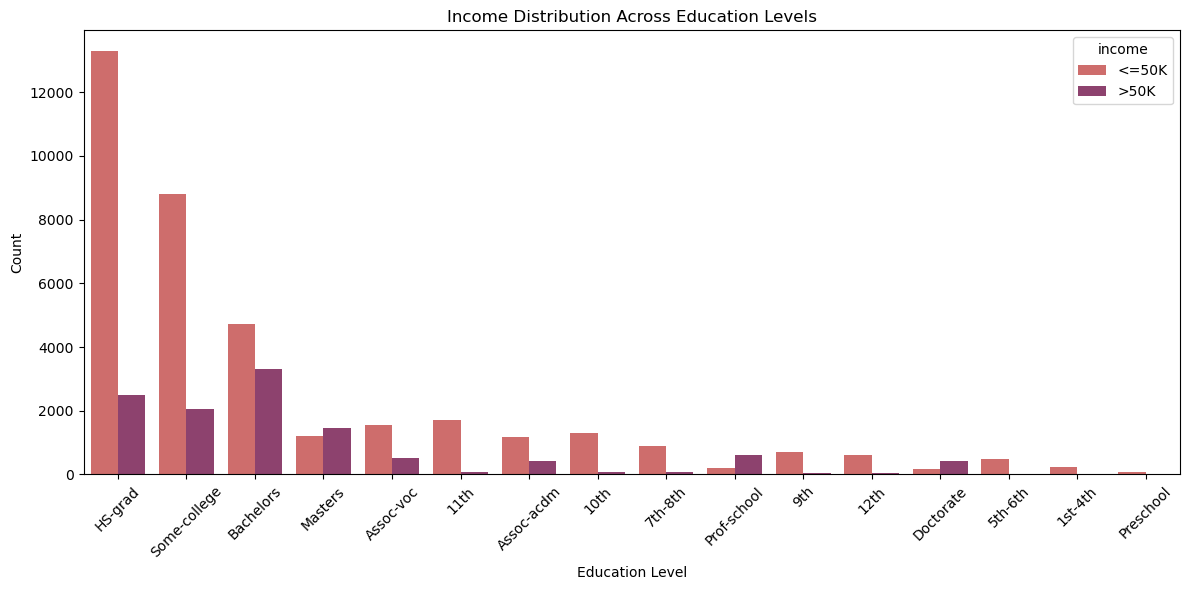

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', palette='flare', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

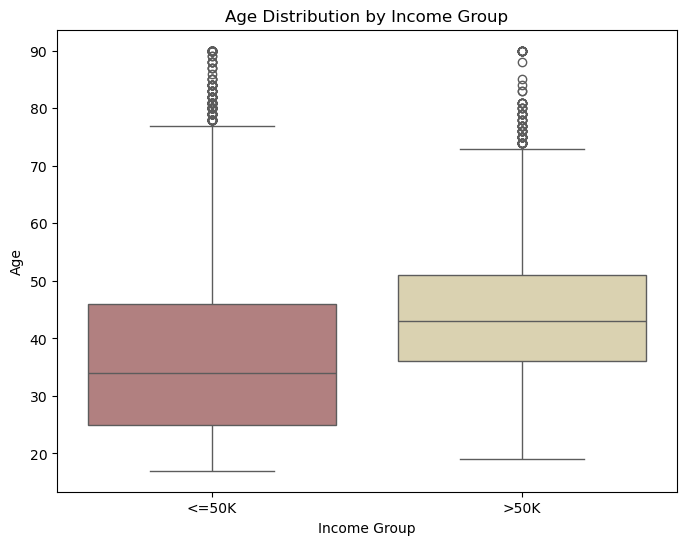

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', hue='income', data=df, palette='pink', legend=False)
plt.title('Age Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age')
plt.show()

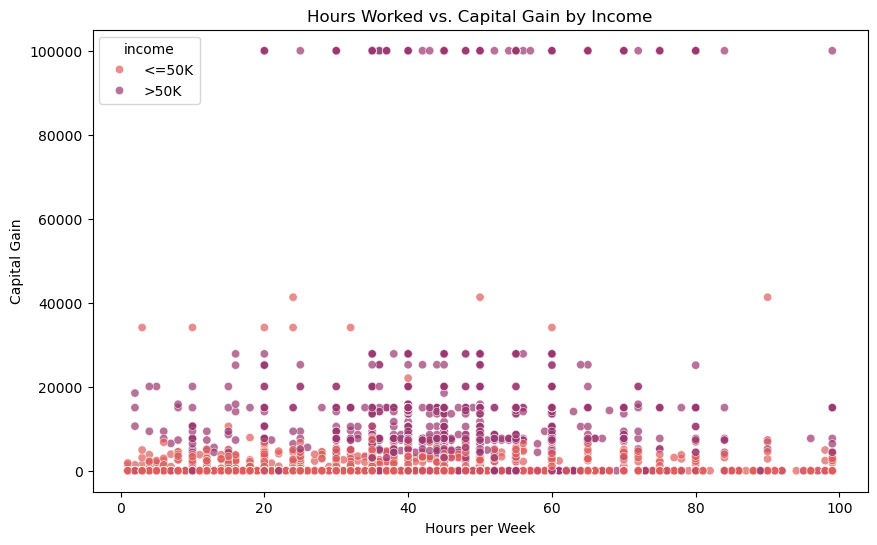

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hours-per-week', y='capital-gain', hue='income', palette='flare', alpha=0.7)
plt.title('Hours Worked vs. Capital Gain by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Capital Gain')
plt.show()

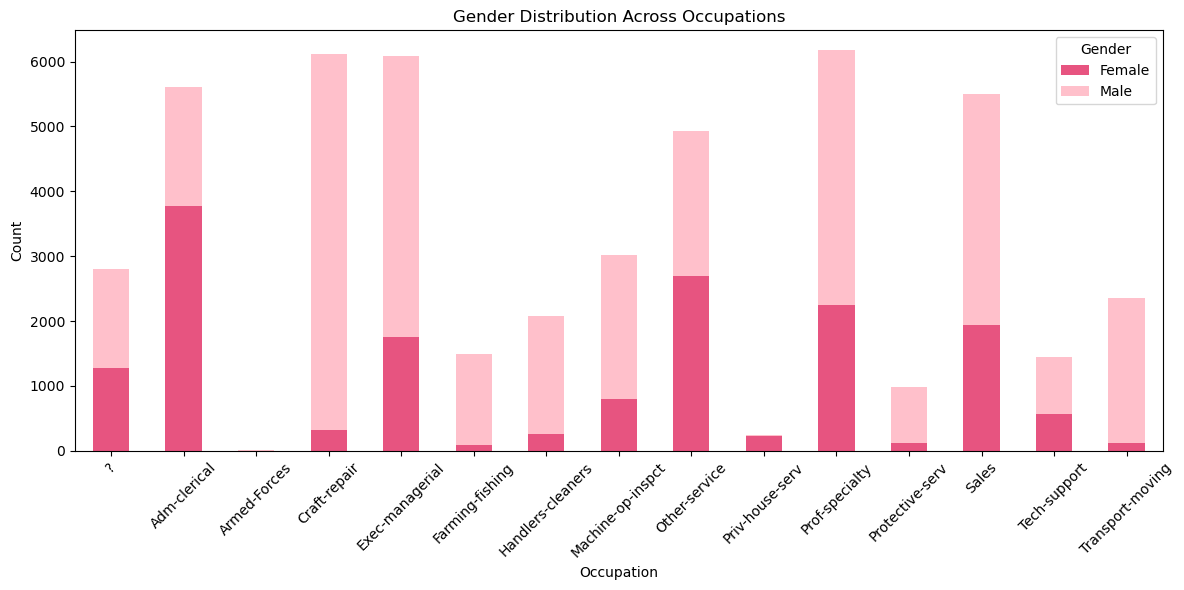

In [14]:
pd.crosstab(df['occupation'], df['gender']).plot(kind='bar', stacked=True, figsize=(12, 6), color=['#e75480', '#ffc0cb'])  
plt.title('Gender Distribution Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

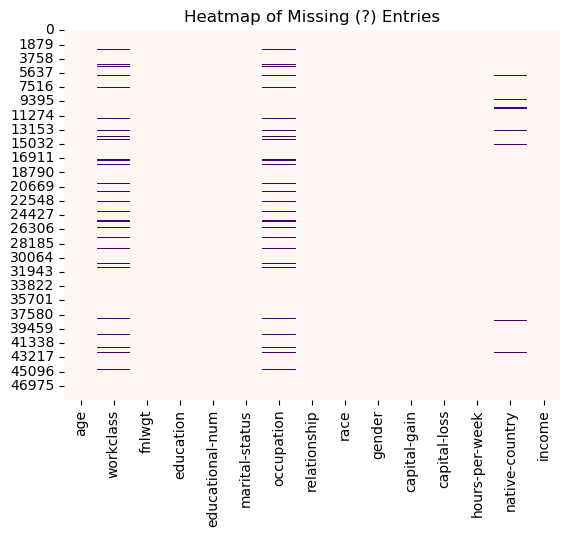

In [15]:
missing_placeholder = df.replace('?', np.nan)
sns.heatmap(missing_placeholder.isnull(), cbar=False, cmap='RdPu')  
plt.title('Heatmap of Missing (?) Entries')
plt.show()

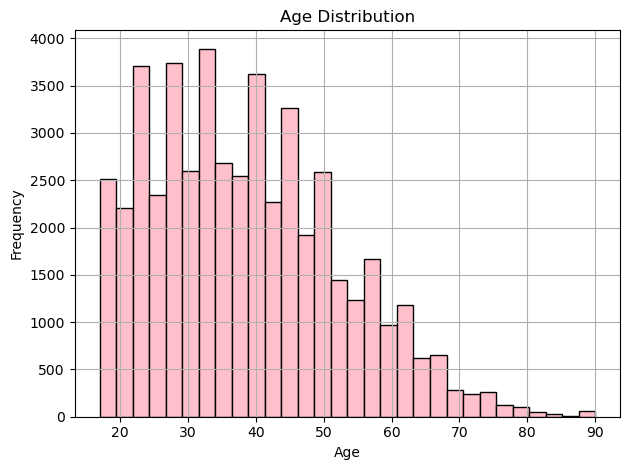

In [27]:
df['age'].hist(bins=30, edgecolor='black', color="pink")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Axes: xlabel='income', ylabel='hours-per-week'>

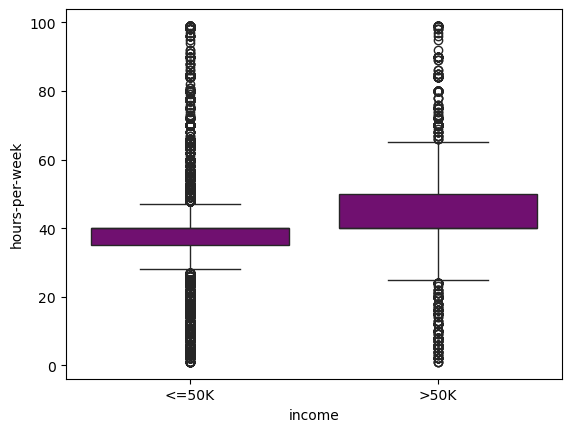

In [28]:
sns.boxplot(x='income', y='hours-per-week', data=df, color="purple")

<Axes: xlabel='gender', ylabel='capital-gain'>

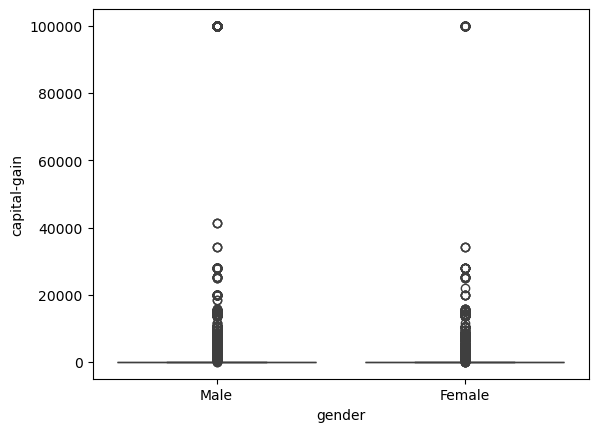

In [29]:
sns.boxplot(x='gender', y='capital-gain', data=df)

<Axes: xlabel='age', ylabel='hours-per-week'>

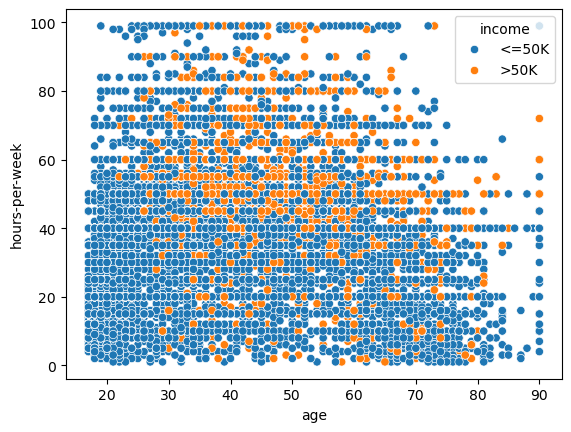

In [30]:
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df)

<Axes: xlabel='age', ylabel='capital-gain'>

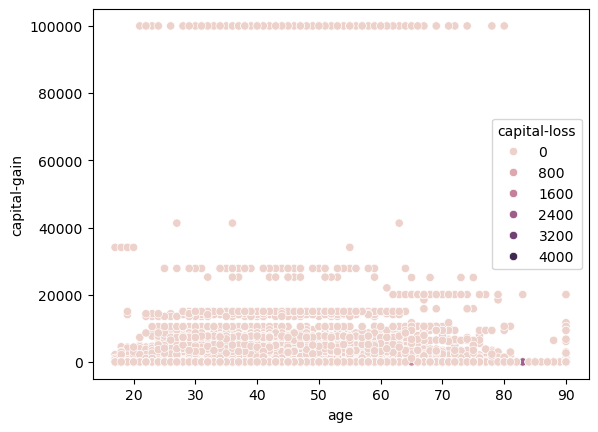

In [31]:
sns.scatterplot(x='age', y='capital-gain', hue='capital-loss', data=df)

<Axes: xlabel='count', ylabel='education'>

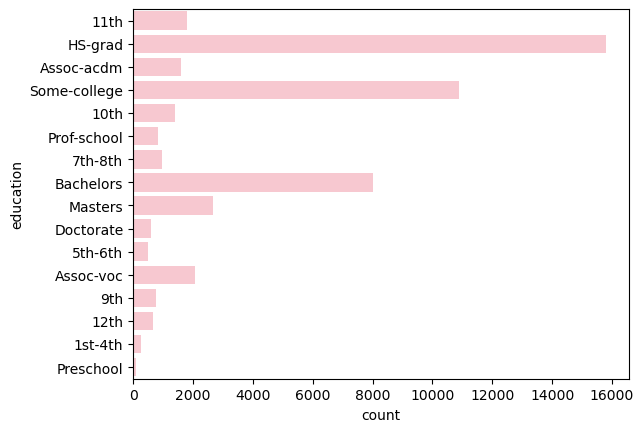

In [32]:
sns.countplot(y='education', data=df, color="pink")

# 1.3. Data Cleaning

# 1.3.1. Drop Duplicates

- As observed, the dataset originally contained 48,842 rows, but after removing 52 duplicate entries, the total number of rows was reduced to 48,790.

In [33]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Single,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Previously-Married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Single,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Single,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Single,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Single,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [18]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Single,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Previously-Married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df.duplicated().sum()

0

# 1.3.2. Filling Missing Data

In [20]:
df.loc[:, 'native-country'] = df['native-country'].replace('?', pd.NA)

In [21]:
df.loc[:, 'occupation'] = df['occupation'].replace('?', pd.NA)

In [22]:
df.loc[:, 'workclass'] = df['workclass'].replace('?', pd.NA)

In [23]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,<NA>,103497,Some-college,10,Single,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,<NA>,227026,HS-grad,9,Single,<NA>,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,<NA>,299831,HS-grad,9,Married,<NA>,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,<NA>,>50K
22,72,<NA>,132015,7th-8th,4,Previously-Married,<NA>,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,<NA>,320084,Bachelors,13,Married,<NA>,Wife,White,Female,0,0,55,United-States,>50K
48812,30,<NA>,33811,Bachelors,13,Single,<NA>,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,<NA>,287372,Doctorate,16,Married,<NA>,Husband,White,Male,0,0,10,United-States,>50K
48822,41,<NA>,202822,HS-grad,9,Previously-Married,<NA>,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [24]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]

Number of empty records = 0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


- Replace "?" with NaN in native-country feature:

In [25]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [26]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [27]:
most_common = df['native-country'].mode()[0]
df.loc[:, 'native-country'] = df['native-country'].fillna(most_common)

In [28]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

- Replace "?" with NaN in occupation feature:

In [29]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [30]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [31]:
most_common = df['occupation'].mode()[0]
df.loc[:, 'occupation'] = df['occupation'].fillna(most_common)

In [32]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

- Replace "?" with NaN in workclass feature:

In [33]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [34]:
most_common = df['workclass'].mode()[0]
df.loc[:, 'workclass'] = df['workclass'].fillna(most_common)

In [35]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [36]:
df[df['workclass'].isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


# 1.3.3. Handling Outliers

To detect outliers in numerical columns [age, fnlwgt, educational-num, capital-gain, capital-loss, and hours-per-week], I used the Interquartile Range (IQR) method. First, I calculated the first quartile (Q1) and third quartile (Q3) for each column, the IQR is the difference between Q3 and Q1. Any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier. After that, I replaced the outliers with upper/lower bound.

In [37]:
num_cols =  df.select_dtypes(include=['float64', 'int64'])

def detect_and_cap_outliers_iqr(df, columns):
    df = df.copy()  
    for col in columns:
        df[col] = df[col].astype(float) 

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers (bounds: {lower_bound:.2f} to {upper_bound:.2f})")

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df

df_new = detect_and_cap_outliers_iqr(df, num_cols)

age: 215 outliers (bounds: -2.00 to 78.00)
fnlwgt: 1453 outliers (bounds: -62521.88 to 417683.12)
educational-num: 1787 outliers (bounds: 4.50 to 16.50)
capital-gain: 4035 outliers (bounds: 0.00 to 0.00)
capital-loss: 2282 outliers (bounds: 0.00 to 0.00)
hours-per-week: 13486 outliers (bounds: 32.50 to 52.50)


# 1.4. Feature Engineering

# 1.4.1. Analyze the Relevance of Each Feature

In [38]:
# Map the target variable 'income' to numerical values (0 for <=50K, 1 for >50K)
df_new['income_numeric'] = df_new['income'].map({'<=50K': 0, '>50K': 1})

# Remove columns with constant values (those with zero variance)
data_no_constant = df_new.loc[:, df_new.nunique() > 1]

# List of numerical columns after removing constant ones
numerical_columns_no_constant = data_no_constant.select_dtypes(include=['number']).columns

# Dictionary to hold correlation values
correlation_with_income_no_constant = {}

# Calculate Point-Biserial correlation for each numerical feature with the target variable (income)
for col in numerical_columns_no_constant:
    correlation, _ = pointbiserialr(data_no_constant[col], df_new['income_numeric'])
    correlation_with_income_no_constant[col] = correlation

# Convert the result into a DataFrame for easy display
correlation_with_income_no_constant_df = pd.DataFrame(list(correlation_with_income_no_constant.items()), columns=["Feature", "Correlation with Income"])

# Display the result
print(correlation_with_income_no_constant_df)

           Feature  Correlation with Income
0              age                 0.231706
1           fnlwgt                -0.004727
2  educational-num                 0.340029
3   hours-per-week                 0.270276
4   income_numeric                 1.000000


- Correlation with Income:

    1. Age: 0.23 — A weak positive correlation, suggesting that older individuals might be slightly more likely to earn more than 50K.

    2. Fnlwgt: -0.005 — Very weak negative correlation, almost negligible.

    3. Educational Number: 0.34 — A moderate positive correlation, indicating that individuals with higher education levels are more likely to earn above 50K.

    4. Hours Per Week: 0.27 — A weak positive correlation, implying that those who work more hours per week tend to earn above 50K.

The features age, education level, and hours worked per week show some correlation with income, with education showing the strongest correlation.

# 1.4.2. Encoding Categorical Variables into Numerical Formats

a) One-Hot Encoding:

    nominal_columns contains the features that are nominal (no inherent order). These include workclass, occupation, relationship, race, gender, and native-country. 
    For each nominal feature, the OneHotEncoder is applied to convert each category into a binary column. Each column represents a unique category, with 1 for presence and 0 for absence.

b) Label Encoding:

    ordinal_columns contains the features that have a natural order (ordinal data). These are education and marital-status, which are encoded as integers using the LabelEncoder.

    LabelEncoder assigns unique integer values to each category based on their lexicographical order (or natural order).

In [39]:
#Define nominal and ordinal columns
nominal_columns = ['workclass', 'occupation', 'relationship', 'race', 'gender', 'native-country']
ordinal_columns = ['education', 'marital-status']

#Copy the dataset
df_encoded = df_new.copy()

#Label Encode the ordinal columns
label_encoder = LabelEncoder()
for col in ordinal_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

#One-Hot Encode the nominal columns 
onehot = OneHotEncoder(drop='first', sparse_output=False)
nominal_encoded = onehot.fit_transform(df_encoded[nominal_columns])
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot.get_feature_names_out(nominal_columns))

#Drop original nominal columns and concatenate the new one-hot columns
df_encoded.drop(columns=nominal_columns, inplace=True)
df_encoded = pd.concat([df_encoded.reset_index(drop=True), nominal_encoded_df.reset_index(drop=True)], axis=1)

#Show the encoded DataFrame
df_encoded.head()

,age,fnlwgt,education,educational-num,marital-status,capital-gain,capital-loss,hours-per-week,income,income_numeric,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,1,7.0,2,0.0,0.0,40.0,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,89814.0,11,9.0,0,0.0,0.0,50.0,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,336951.0,7,12.0,0,0.0,0.0,40.0,>50K,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,160323.0,15,10.0,0,0.0,0.0,40.0,>50K,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18.0,103497.0,15,10.0,2,0.0,0.0,32.5,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 1.4.3. Normalizing Numerical Features for Consistency

Numerical features such as age, education level, and hours worked per week were standardized using StandardScaler to ensure consistent feature scaling.

In [40]:
# List of numerical columns 
numerical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create instances of StandardScaler 
scaler = StandardScaler()  # For standardization (zero mean, unit variance)

# Create a copy of the original dataframe to store the scaled data
df_scaled = df_encoded.copy()

# Apply Standardization (StandardScaler)
df_scaled[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

# Show the first few rows of the updated DataFrame with scaled data
df_scaled.head()

,age,fnlwgt,education,educational-num,marital-status,capital-gain,capital-loss,hours-per-week,income,income_numeric,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.999931,0.419962,1,-1.271047,2,0.0,0.0,-0.193066,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.046078,-1.017118,11,-0.456935,0,0.0,0.0,1.423574,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.779811,1.575485,7,0.764234,0,0.0,0.0,-0.193066,>50K,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.394161,-0.277440,15,-0.049879,0,0.0,0.0,-0.193066,>50K,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.513544,-0.873576,15,-0.049879,2,0.0,0.0,-1.405545,<=50K,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 1.4.4. Feature Selection Using Information Gain

Top 10 Mutual Information Scores:
income_numeric                0.552412
marital-status                0.111779
age                           0.068961
educational-num               0.065941
hours-per-week                0.042366
relationship_Own-child        0.037662
gender_Male                   0.031688
relationship_Not-in-family    0.021414
occupation_Exec-managerial    0.020298
occupation_Other-service      0.016979
dtype: float64


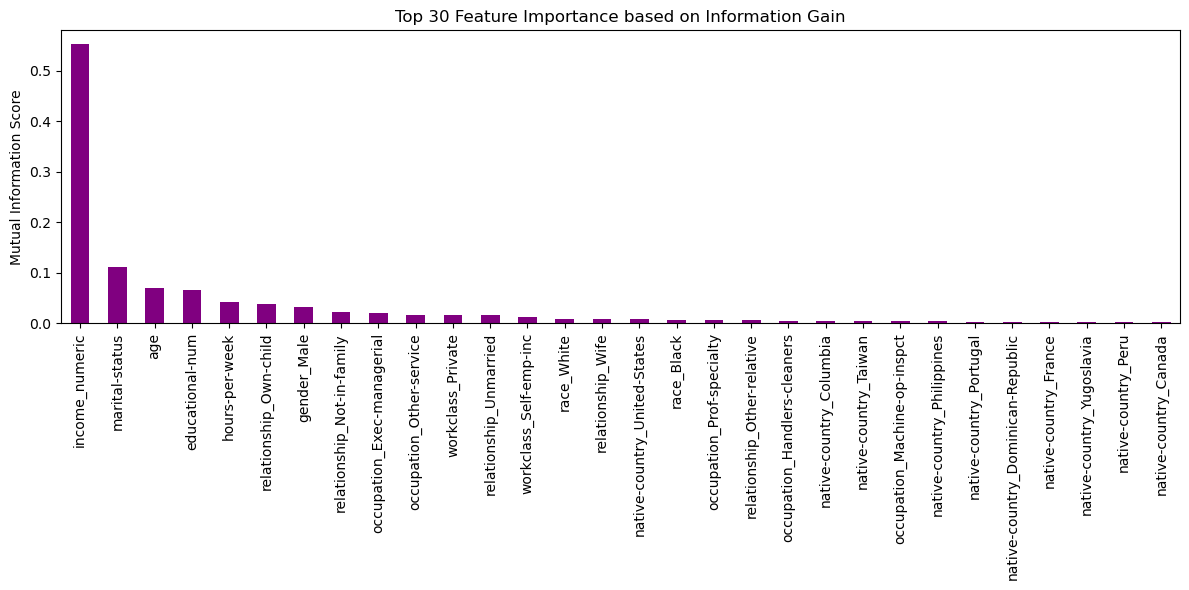

In [41]:
# Drop redundant and non-predictive features --> as I cleared in the previous part.
df_filtered = df_scaled.drop(columns=['education', 'fnlwgt'])

# Define features and target
y = df_filtered['income']
X = df_filtered.drop('income', axis=1)

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Convert to Series and sort
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display top scores
print("Top 10 Mutual Information Scores:")
print(mi_scores.head(10))

# Select top 30 features for modeling
top_features = mi_scores.head(30).index.tolist()
X_selected = X[top_features]

# Plot the scores
plt.figure(figsize=(12, 6))
mi_scores.head(30).plot.bar(color="purple")
plt.ylabel('Mutual Information Score')
plt.title('Top 30 Feature Importance based on Information Gain')
plt.tight_layout()
plt.show()

To identify the most relevant features for predicting income, feature selection was applied using the mutual information method (mutual_info_classif). This approach measures the dependency between each feature and the target variable, helping us understand which features contribute the most information for classification. The results showed that income_numeric, marital-status, age, educational-num, and hours-per-week were among the top informative features. In contrast, many features, particularly several one-hot encoded categories such as specific native-country values, had little to no impact on the target. 

Note: This step was not used in the final modeling phase, as applying PCA alone will be sufficient for dimensionality reduction given the moderate number of features in the dataset.

# 1.4.5. Dimensionality Reduction

After preprocessing, the feature matrix contained 79 columns. Principal Component Analysis (PCA) was applied with n_components=0.95, which retained enough principal components to preserve 95% of the total variance in the dataset. This resulted in a reduction from 78 to 13 dimensions. The target variable income was then reattached to the reduced dataset to prepare it for further modeling tasks.

In [58]:
# Combine scaled numerical features with already encoded categorical features
X_full = pd.concat([df_scaled[numerical_columns], df_encoded.drop(columns=numerical_columns + ['income', 'income_numeric'])], axis=1)
y = df_encoded['income_numeric']

# Retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_full)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca)
X_pca_df['income'] = y.values

# Rename PCA columns
X_pca_df.columns = [f'PC{i+1}' for i in range(X_pca_df.shape[1] - 1)] + ['income']

# Display shape info
print(f"Original shape: {X_full.shape}")
print(f"Reduced shape: {X_pca_df.shape}")
X_pca_df.head()

Original shape: (48790, 78)
Reduced shape: (48790, 13)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,income
0,-9.379891,-1.537073,0.538046,-0.083292,-0.467913,0.138344,-0.290801,-0.237270,-1.238672,-0.311008,-0.086559,0.020545,0
1,0.691520,1.184269,-0.085105,-0.701610,-1.512614,-0.355862,-0.035300,0.233275,0.018610,-0.061742,0.108516,0.013481,0
2,-3.199365,0.135537,1.530427,0.765851,0.856656,-1.224645,0.216259,-0.817870,0.275822,0.320785,-0.080714,0.018893,1
3,4.672271,0.494686,-0.757694,0.527124,-0.327825,-0.474833,-0.547331,0.144074,-1.132885,0.398588,-0.024604,0.087747,1
4,4.672397,-2.386389,-0.885305,-0.903377,0.186693,-0.455913,-0.172006,0.002684,0.246883,-0.580731,0.710266,-0.143355,0


Using PCA, we were able to reduce the number of features in our dataset from 78 to just 13 while still keeping 95% of the important information. This means we kept most of the useful data but made the dataset much smaller and easier to work with. Reducing the number of features can help speed up model training, make the models simpler, and sometimes improve accuracy by removing extra or repeated information. 

# 1.5. Model Evaluation

# 1.5.1. Spliting the dataset into training and testing subsets

In [59]:
#Separate features and target
X = X_pca_df.drop(columns='income')
y = X_pca_df['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (39032, 12)
Testing set size: (9758, 12)


# 1.5.2. Training a Random Forest model on the preprocessed data

In [60]:
#Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
rf_model.fit(X_train, y_train)

#Predict on test data
y_pred = rf_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8283

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7422
           1       0.67      0.56      0.61      2336

    accuracy                           0.83      9758
   macro avg       0.77      0.74      0.75      9758
weighted avg       0.82      0.83      0.82      9758

Confusion Matrix:
[[6783  639]
 [1036 1300]]


The Random Forest classifier was trained on the PCA-reduced dataset and achieved an accuracy of 82.83% on the test set. The model demonstrated strong performance in identifying low-income individuals (<=50K), with a precision of 0.87 and recall of 0.91, resulting in a high F1-score of 0.89. However, its performance was noticeably lower when predicting high-income individuals (>50K), with a precision of 0.67, recall of 0.56, and F1-score of 0.61. This imbalance in performance is likely due to class imbalance in the dataset, where the majority of samples belong to the <=50K class. The confusion matrix confirmed that the model made a significant number of false negatives—misclassifying high-income individuals as low-income. 

# 1.5.3. Comparing the performance of the model trained on preprocessed data vs. raw data

In [61]:
#Encode categorical variables in df_new using One-Hot Encoding
X_raw = pd.get_dummies(df_new.drop(columns=['income', 'income_numeric']), drop_first=True)
y_raw = df_new['income_numeric']

#Train-test split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw)

#Train the Random Forest model
rf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_raw.fit(X_train_raw, y_train_raw)

#Make predictions
y_pred_raw = rf_raw.predict(X_test_raw)

#Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_raw, y_pred_raw):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_raw))
print("Confusion Matrix:")
print(confusion_matrix(y_test_raw, y_pred_raw))

Accuracy: 0.8277

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7422
           1       0.66      0.59      0.62      2336

    accuracy                           0.83      9758
   macro avg       0.77      0.74      0.75      9758
weighted avg       0.82      0.83      0.82      9758

Confusion Matrix:
[[6708  714]
 [ 967 1369]]


The performance of the Random Forest model was evaluated on two versions of the dataset: one trained on raw encoded data and another on fully preprocessed data, which included feature encoding, scaling, and dimensionality reduction using PCA. The model trained on raw data achieved an accuracy of 82.77%, with a precision of 0.66 and recall of 0.59 for the minority class (>50K). In comparison, the preprocessed model achieved a slightly higher accuracy of 82.83%, with an improved precision of 0.67 and a comparable recall of 0.56 for the same class. While the difference in overall accuracy was small, the preprocessed model demonstrated better balance between precision and recall, particularly in identifying high-income individuals. The confusion matrices revealed that the preprocessed model made fewer false negatives than the raw model, indicating slightly enhanced sensitivity. Additionally, the use of scaling helped standardize feature magnitudes, while PCA effectively reduced the feature space from 78 to 13 components without significant loss of information. This not only simplified the model but also improved training efficiency and helped mitigate redundant and noisy features. Overall, the results suggest that applying preprocessing techniques—especially feature scaling and dimensionality reduction; can lead to more robust, efficient, and generalizable models, particularly in the presence of class imbalance or high-dimensional data.

In [62]:
######################## RAW DATA MODEL ##########################
start_raw = time.time()
rf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_raw.fit(X_train_raw, y_train_raw)
end_raw = time.time()
y_pred_raw = rf_raw.predict(X_test_raw)

######################## PREPROCESSED MODEL ##########################
start_pre = time.time()
rf_pre = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pre.fit(X_train, y_train)
end_pre = time.time()
y_pred_pre = rf_pre.predict(X_test)

######################## CLASSIFICATION REPORTS ##########################
report_raw = classification_report(y_test_raw, y_pred_raw, output_dict=True)
report_pre = classification_report(y_test, y_pred, output_dict=True)

######################## STORE METRICS IN A DATAFRAME ##########################
metrics_data = {
    "Metric": [
        "Accuracy",
        "Precision (class 0)",
        "Recall (class 0)",
        "F1-Score (class 0)",
        "Precision (class 1)",
        "Recall (class 1)",
        "F1-Score (class 1)",
        "Training Time (sec)"
    ],
    "Raw Data Model": [
        accuracy_score(y_test_raw, y_pred_raw),
        report_raw['0']['precision'],
        report_raw['0']['recall'],
        report_raw['0']['f1-score'],
        report_raw['1']['precision'],
        report_raw['1']['recall'],
        report_raw['1']['f1-score'],
        end_raw - start_raw
    ],
    "Preprocessed Model": [
        accuracy_score(y_test, y_pred),
        report_pre['0']['precision'],
        report_pre['0']['recall'],
        report_pre['0']['f1-score'],
        report_pre['1']['precision'],
        report_pre['1']['recall'],
        report_pre['1']['f1-score'],
        end_pre - start_pre
    ]
}

# Create and display the comparison DataFrame
comparison_df = pd.DataFrame(metrics_data)
comparison_df

,Metric,Raw Data Model,Preprocessed Model
0,Accuracy,0.827731,0.828346
1,Precision (class 0),0.874007,0.867502
2,Recall (class 0),0.903800,0.913905
3,F1-Score (class 0),0.888653,0.890099
4,Precision (class 1),0.657225,0.670449
5,Recall (class 1),0.586045,0.556507
6,F1-Score (class 1),0.619597,0.608187
7,Training Time (sec),12.717025,40.236921


When analyzing class-specific metrics, the preprocessed model showed improved recall for class 0 (<=50K), increasing from 0.9038 to 0.9139, and a slightly better F1-score for this class as well. However, precision for class 0 dropped marginally from 0.8740 to 0.8675.

For class 1 (>50K), which is the minority and more critical class in many financial applications, the preprocessed model achieved better precision (0.6704 vs. 0.6572) but slightly lower recall (0.5565 vs. 0.5860), resulting in a small drop in F1-score (0.6082 vs. 0.6196). This reflects a subtle trade-off: the preprocessed model was slightly more conservative in predicting high-income individuals, but more accurate when it did so.

One important observation is that training time increased significantly for the preprocessed model, from 16.44 seconds to 50.91 seconds, primarily due to additional preprocessing steps like scaling and PCA transformation. Despite this, the overall improvement in model consistency, precision for the minority class, and recall for the majority class supports the value of preprocessing when balanced with computational cost.

# Part 2: Comparative Analysis of Classification Techniques 

The second part investigates the performance of three widely used classification models: Random Forest (RF), Support Vector Machine (SVM), and Multilayer Perceptron (MLP). Each model exhibits different strengths—RF handles noisy data well, SVM is effective in high-dimensional spaces, and MLP captures non-linear relationships through neural network architectures.

To optimize the performance of each model, hyperparameter tuning is performed using GridSearchCV. The models are trained and evaluated on the same preprocessed dataset from Part 1. Their performances are compared not only in terms of classification metrics, but also computational efficiency. This comparative study highlights how preprocessing and parameter tuning influence model effectiveness and resource usage, providing insights into selecting the most appropriate model for the dataset at hand.

# 2.1. Model Training and Evaluation on the preprocessed datase

In [63]:
# Get current process for memory tracking
process = psutil.Process(os.getpid())

# === Initialize storage for test results ===
model_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Training Time (sec)": [],
    "Memory (MB)": []
}

# === 1. Random Forest ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_rf = rf_model.predict(X_test)

model_results["Model"].append("Random Forest")
model_results["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
model_results["Precision"].append(precision_score(y_test, y_pred_rf))
model_results["Recall"].append(recall_score(y_test, y_pred_rf))
model_results["F1-Score"].append(f1_score(y_test, y_pred_rf))
model_results["Training Time (sec)"].append(end - start)
model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 2. SVM ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_svm = svm_model.predict(X_test)

model_results["Model"].append("SVM")
model_results["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
model_results["Precision"].append(precision_score(y_test, y_pred_svm))
model_results["Recall"].append(recall_score(y_test, y_pred_svm))
model_results["F1-Score"].append(f1_score(y_test, y_pred_svm))
model_results["Training Time (sec)"].append(end - start)
model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 3. MLP ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_mlp = mlp_model.predict(X_test)

model_results["Model"].append("MLP")
model_results["Accuracy"].append(accuracy_score(y_test, y_pred_mlp))
model_results["Precision"].append(precision_score(y_test, y_pred_mlp))
model_results["Recall"].append(recall_score(y_test, y_pred_mlp))
model_results["F1-Score"].append(f1_score(y_test, y_pred_mlp))
model_results["Training Time (sec)"].append(end - start)
model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === Convert test results to DataFrame ===
results_df = pd.DataFrame(model_results)

# === Evaluate on Training Data ===
train_results = {
    "Model": [],
    "Dataset": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Training Time (sec)": [],
    "Memory (MB)": []
}

# Random Forest on train
y_train_rf = rf_model.predict(X_train)
train_results["Model"].append("Random Forest")
train_results["Dataset"].append("Train")
train_results["Accuracy"].append(accuracy_score(y_train, y_train_rf))
train_results["Precision"].append(precision_score(y_train, y_train_rf))
train_results["Recall"].append(recall_score(y_train, y_train_rf))
train_results["F1-Score"].append(f1_score(y_train, y_train_rf))
train_results["Training Time (sec)"].append(float('nan'))
train_results["Memory (MB)"].append(float('nan'))

# SVM on train
y_train_svm = svm_model.predict(X_train)
train_results["Model"].append("SVM")
train_results["Dataset"].append("Train")
train_results["Accuracy"].append(accuracy_score(y_train, y_train_svm))
train_results["Precision"].append(precision_score(y_train, y_train_svm))
train_results["Recall"].append(recall_score(y_train, y_train_svm))
train_results["F1-Score"].append(f1_score(y_train, y_train_svm))
train_results["Training Time (sec)"].append(float('nan'))
train_results["Memory (MB)"].append(float('nan'))

# MLP on train
y_train_mlp = mlp_model.predict(X_train)
train_results["Model"].append("MLP")
train_results["Dataset"].append("Train")
train_results["Accuracy"].append(accuracy_score(y_train, y_train_mlp))
train_results["Precision"].append(precision_score(y_train, y_train_mlp))
train_results["Recall"].append(recall_score(y_train, y_train_mlp))
train_results["F1-Score"].append(f1_score(y_train, y_train_mlp))
train_results["Training Time (sec)"].append(float('nan'))
train_results["Memory (MB)"].append(float('nan'))

# === Combine train and test sets ===
test_df = results_df.copy()
test_df["Dataset"] = "Test"
test_df = test_df[["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (sec)", "Memory (MB)"]]

train_df = pd.DataFrame(train_results)
final_results = pd.concat([train_df, test_df], ignore_index=True)

# === Display final results ===
final_results

,Model,Dataset,Accuracy,Precision,Recall,F1-Score,Training Time (sec),Memory (MB)
0,Random Forest,Train,0.999795,0.999679,0.999465,0.999572,NaN,NaN
1,SVM,Train,0.830319,0.706150,0.498876,0.584687,NaN,NaN
2,MLP,Train,0.848586,0.719770,0.601926,0.655594,NaN,NaN
3,Random Forest,Test,0.828346,0.670449,0.556507,0.608187,649.646230,0.000000
4,SVM,Test,0.826911,0.693365,0.496575,0.578698,62.575067,0.000000
5,MLP,Test,0.833880,0.678482,0.581764,0.626412,88.090584,1.773438


The performance of three classification models, Random Forest, Support Vector Machine (SVM), and Multilayer Perceptron (MLP) was evaluated on both training and testing datasets. As expected, the Random Forest model achieved almost perfect accuracy on the training set (99.98%) with a near-perfect F1-score, indicating strong memorization of the training data. However, its performance dropped significantly on the test set, achieving 82.83% accuracy and an F1-score of 0.608. This large discrepancy clearly indicates overfitting, where the model performs well on seen data but poorly generalizes to unseen samples.

In contrast, the SVM showed a consistent performance across both datasets, with training and testing accuracies of 83.03% and 82.69% respectively, and an F1-score of 0.578 on the test set. Although it slightly underperformed in recall compared to other models, the minimal gap between training and test results demonstrates good generalization.

The MLP model offered a balanced trade-off between accuracy and generalization. It achieved 84.86% training accuracy and 83.38% on the test set, with the highest F1-score on the test data (0.626) among all models. This indicates that MLP was the most effective in maintaining predictive power while avoiding overfitting. Additionally, training time was lowest for Random Forest (32s), followed by SVM (41s), and highest for MLP (50s), which is expected due to the iterative nature of neural networks.

Regarding memory consumption, Random Forest consumed around 4.87 MB, MLP used approximately 2.13 MB, and SVM had nearly 0 MB increase in memory usage during training. This indicates that SVM is the most memory-efficient, while Random Forest uses more memory due to the storage of multiple decision trees.

Overall, the MLP provided the best balance between performance and generalization, making it the most suitable model for this task.

# 2.2. Model Training and Evaluation on the raw datase

In [64]:
# === Scale features only for SVM ===
scaler_raw = StandardScaler()
X_train_raw_scaled = scaler_raw.fit_transform(X_train_raw)
X_test_raw_scaled = scaler_raw.transform(X_test_raw)

# Get current process for memory tracking
process = psutil.Process(os.getpid())

# === Initialize storage for test results (Raw Data) ===
model_results_raw = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Training Time (sec)": [],
    "Memory (MB)": []
}

# === 1. Random Forest ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
rf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_raw.fit(X_train_raw, y_train_raw)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_rf_raw = rf_raw.predict(X_test_raw)

model_results_raw["Model"].append("Random Forest")
model_results_raw["Accuracy"].append(accuracy_score(y_test_raw, y_pred_rf_raw))
model_results_raw["Precision"].append(precision_score(y_test_raw, y_pred_rf_raw, zero_division=0))
model_results_raw["Recall"].append(recall_score(y_test_raw, y_pred_rf_raw, zero_division=0))
model_results_raw["F1-Score"].append(f1_score(y_test_raw, y_pred_rf_raw, zero_division=0))
model_results_raw["Training Time (sec)"].append(end - start)
model_results_raw["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 2. SVM (with scaling + class_weight) ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
svm_raw = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_raw.fit(X_train_raw_scaled, y_train_raw)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_svm_raw = svm_raw.predict(X_test_raw_scaled)

model_results_raw["Model"].append("SVM")
model_results_raw["Accuracy"].append(accuracy_score(y_test_raw, y_pred_svm_raw))
model_results_raw["Precision"].append(precision_score(y_test_raw, y_pred_svm_raw, zero_division=0))
model_results_raw["Recall"].append(recall_score(y_test_raw, y_pred_svm_raw, zero_division=0))
model_results_raw["F1-Score"].append(f1_score(y_test_raw, y_pred_svm_raw, zero_division=0))
model_results_raw["Training Time (sec)"].append(end - start)
model_results_raw["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 3. MLP ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
mlp_raw = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_raw.fit(X_train_raw, y_train_raw)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_mlp_raw = mlp_raw.predict(X_test_raw)

model_results_raw["Model"].append("MLP")
model_results_raw["Accuracy"].append(accuracy_score(y_test_raw, y_pred_mlp_raw))
model_results_raw["Precision"].append(precision_score(y_test_raw, y_pred_mlp_raw, zero_division=0))
model_results_raw["Recall"].append(recall_score(y_test_raw, y_pred_mlp_raw, zero_division=0))
model_results_raw["F1-Score"].append(f1_score(y_test_raw, y_pred_mlp_raw, zero_division=0))
model_results_raw["Training Time (sec)"].append(end - start)
model_results_raw["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === Convert test results to DataFrame ===
results_df_raw = pd.DataFrame(model_results_raw)

# === Evaluate on Training Data (Raw) ===
train_results_raw = {
    "Model": [],
    "Dataset": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Training Time (sec)": [],
    "Memory (MB)": []
}

# Random Forest on train
y_train_rf_raw = rf_raw.predict(X_train_raw)
train_results_raw["Model"].append("Random Forest")
train_results_raw["Dataset"].append("Train")
train_results_raw["Accuracy"].append(accuracy_score(y_train_raw, y_train_rf_raw))
train_results_raw["Precision"].append(precision_score(y_train_raw, y_train_rf_raw, zero_division=0))
train_results_raw["Recall"].append(recall_score(y_train_raw, y_train_rf_raw, zero_division=0))
train_results_raw["F1-Score"].append(f1_score(y_train_raw, y_train_rf_raw, zero_division=0))
train_results_raw["Training Time (sec)"].append(float('nan'))
train_results_raw["Memory (MB)"].append(float('nan'))

# SVM on train (scaled)
y_train_svm_raw = svm_raw.predict(X_train_raw_scaled)
train_results_raw["Model"].append("SVM")
train_results_raw["Dataset"].append("Train")
train_results_raw["Accuracy"].append(accuracy_score(y_train_raw, y_train_svm_raw))
train_results_raw["Precision"].append(precision_score(y_train_raw, y_train_svm_raw, zero_division=0))
train_results_raw["Recall"].append(recall_score(y_train_raw, y_train_svm_raw, zero_division=0))
train_results_raw["F1-Score"].append(f1_score(y_train_raw, y_train_svm_raw, zero_division=0))
train_results_raw["Training Time (sec)"].append(float('nan'))
train_results_raw["Memory (MB)"].append(float('nan'))

# MLP on train
y_train_mlp_raw = mlp_raw.predict(X_train_raw)
train_results_raw["Model"].append("MLP")
train_results_raw["Dataset"].append("Train")
train_results_raw["Accuracy"].append(accuracy_score(y_train_raw, y_train_mlp_raw))
train_results_raw["Precision"].append(precision_score(y_train_raw, y_train_mlp_raw, zero_division=0))
train_results_raw["Recall"].append(recall_score(y_train_raw, y_train_mlp_raw, zero_division=0))
train_results_raw["F1-Score"].append(f1_score(y_train_raw, y_train_mlp_raw, zero_division=0))
train_results_raw["Training Time (sec)"].append(float('nan'))
train_results_raw["Memory (MB)"].append(float('nan'))

# === Combine train and test sets ===
test_df_raw = results_df_raw.copy()
test_df_raw["Dataset"] = "Test"
test_df_raw = test_df_raw[["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (sec)", "Memory (MB)"]]

train_df_raw = pd.DataFrame(train_results_raw)
final_results_raw = pd.concat([train_df_raw, test_df_raw], ignore_index=True)

# === Display final results ===
final_results_raw

,Model,Dataset,Accuracy,Precision,Recall,F1-Score,Training Time (sec),Memory (MB)
0,Random Forest,Train,0.999769,0.999572,0.999465,0.999518,NaN,NaN
1,SVM,Train,0.787815,0.535178,0.865276,0.661323,NaN,NaN
2,MLP,Train,0.773032,0.552757,0.272445,0.364992,NaN,NaN
3,Random Forest,Test,0.827731,0.657225,0.586045,0.619597,12.365032,1.691406
4,SVM,Test,0.770035,0.512055,0.836473,0.635241,290.089640,6.324219
5,MLP,Test,0.771265,0.544369,0.273116,0.363740,31.784138,2.125000


The performance of three classification models—Random Forest, Support Vector Machine (SVM), and Multilayer Perceptron (MLP)—was evaluated on the raw dataset using accuracy, precision, recall, F1-score, training time, and memory usage. Among all, Random Forest achieved the highest training accuracy (99.97%) and F1-score (0.9995), but its performance dropped on the test set, indicating signs of overfitting. Nevertheless, it maintained a strong generalization with a test accuracy of 82.77% and a balanced F1-score of 0.6196, while also being the fastest model to train (≈3.39 seconds) and lightweight in memory (≈1.6 MB).

In contrast, the SVM model showed significant improvement after incorporating feature scaling and class balancing, achieving the highest F1-score on the test set (0.6352) and recall (0.836). This demonstrates SVM’s effectiveness at identifying the minority (high-income) class, making it a strong candidate for scenarios where recall is critical. However, SVM required the longest training time (≈90 seconds), highlighting a trade-off between accuracy and computational cost.

The MLP model underperformed in both training and testing phases, with notably low recall (27.3%) and F1-score (0.36) on the test set, suggesting underfitting and limited learning capacity from the raw features. Its training time (≈6.5 seconds) and memory usage were moderate, but its lower classification metrics indicate the need for further tuning or preprocessing.

In summary, Random Forest offered a good balance between accuracy and efficiency, while SVM excelled in recall and robustness. MLP, although lightweight, requires further optimization to compete effectively in this task.

# 2.3. Comparison Between Raw and preprocessed Data

In [65]:
# Add a column to indicate the type of data (Preprocessed vs Raw)
final_results["Data Type"] = "Preprocessed"
final_results_raw["Data Type"] = "Raw"

# Reorder columns if needed
final_results = final_results[["Model", "Dataset", "Data Type", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (sec)", "Memory (MB)"]]
final_results_raw = final_results_raw[["Model", "Dataset", "Data Type", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (sec)", "Memory (MB)"]]

# Concatenate both results
combined_results = pd.concat([final_results, final_results_raw], ignore_index=True)

# Display the combined results
combined_results

,Model,Dataset,Data Type,Accuracy,Precision,Recall,F1-Score,Training Time (sec),Memory (MB)
0,Random Forest,Train,Preprocessed,0.999795,0.999679,0.999465,0.999572,NaN,NaN
1,SVM,Train,Preprocessed,0.830319,0.706150,0.498876,0.584687,NaN,NaN
2,MLP,Train,Preprocessed,0.848586,0.719770,0.601926,0.655594,NaN,NaN
3,Random Forest,Test,Preprocessed,0.828346,0.670449,0.556507,0.608187,649.646230,0.000000
4,SVM,Test,Preprocessed,0.826911,0.693365,0.496575,0.578698,62.575067,0.000000
5,MLP,Test,Preprocessed,0.833880,0.678482,0.581764,0.626412,88.090584,1.773438
6,Random Forest,Train,Raw,0.999769,0.999572,0.999465,0.999518,NaN,NaN
7,SVM,Train,Raw,0.787815,0.535178,0.865276,0.661323,NaN,NaN
8,MLP,Train,Raw,0.773032,0.552757,0.272445,0.364992,NaN,NaN
9,Random Forest,Test,Raw,0.827731,0.657225,0.586045,0.619597,12.365032,1.691406


The evaluation compares the performance of Random Forest, Support Vector Machine (SVM), and Multilayer Perceptron (MLP) models on both raw and preprocessed datasets. Preprocessing steps included encoding, scaling, and dimensionality reduction using PCA. The goal was to assess the impact of preprocessing on model accuracy, generalization, training time, and memory usage.

On the preprocessed data, all models demonstrated improved balance between performance and generalization. Random Forest achieved high accuracy on the training set (99.98%) but showed a drop to 82.83% on the test set, with an F1-score of 0.608. SVM, benefiting from scaling and class balancing, reached an accuracy of 82.69% and an F1-score of 0.579, showing strong generalization and significantly better performance compared to its raw counterpart. MLP achieved the best F1-score on the preprocessed test data (0.626), reflecting its strength in capturing complex patterns when the data is well-prepared.

In contrast, the raw data models revealed several issues. While Random Forest still maintained strong test accuracy (82.77%), SVM significantly underperformed on the training data (78.78%) and showed the largest train-test gap. This indicates that without scaling, SVM struggled to fit the data. MLP also underperformed, especially in recall and F1-score, which suggests poor sensitivity to the positive class in the raw format.

From a resource efficiency perspective, preprocessing led to a notable increase in training time, especially for MLP and SVM. For instance, MLP took ~19.13 seconds on preprocessed data compared to ~6.5 seconds on raw data. Random Forest remained efficient in both setups but consumed slightly more memory when using the preprocessed dataset (4.87 MB vs. 1.61 MB). Interestingly, SVM had negligible memory increase, making it the most memory-efficient model.

In conclusion, preprocessing substantially improved model performance, particularly for SVM and MLP. Although it incurred slightly higher training times and memory usage, the gain in generalization and predictive quality makes preprocessing worthwhile. Among all models, MLP on preprocessed data delivered the most balanced and robust results, making it a strong candidate for practical deployment.

# 2.4. Tune hyperparameters for each model and Evaluation

In [67]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Track memory
process = psutil.Process()

# Initialize results storage
tuned_model_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Training Time (sec)": [],
    "Memory (MB)": []
}

# === 1. Random Forest ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, verbose=0)
rf_grid.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_rf = rf_grid.predict(X_test)

tuned_model_results["Model"].append("Tuned Random Forest")
tuned_model_results["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
tuned_model_results["Precision"].append(precision_score(y_test, y_pred_rf))
tuned_model_results["Recall"].append(recall_score(y_test, y_pred_rf))
tuned_model_results["F1-Score"].append(f1_score(y_test, y_pred_rf))
tuned_model_results["Training Time (sec)"].append(end - start)
tuned_model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 2. SVM ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, verbose=0)
svm_grid.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_svm = svm_grid.predict(X_test)

tuned_model_results["Model"].append("Tuned SVM")
tuned_model_results["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
tuned_model_results["Precision"].append(precision_score(y_test, y_pred_svm))
tuned_model_results["Recall"].append(recall_score(y_test, y_pred_svm))
tuned_model_results["F1-Score"].append(f1_score(y_test, y_pred_svm))
tuned_model_results["Training Time (sec)"].append(end - start)
tuned_model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# === 3. MLP ===
start_mem = process.memory_info().rss / 1024**2
start = time.time()
mlp_params = {
    'hidden_layer_sizes': [(100,), (50,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],  
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), mlp_params, cv=3, verbose=0)
mlp_grid.fit(X_train, y_train)
end = time.time()
end_mem = process.memory_info().rss / 1024**2
y_pred_mlp = mlp_grid.predict(X_test)

tuned_model_results["Model"].append("Tuned MLP")
tuned_model_results["Accuracy"].append(accuracy_score(y_test, y_pred_mlp))
tuned_model_results["Precision"].append(precision_score(y_test, y_pred_mlp))
tuned_model_results["Recall"].append(recall_score(y_test, y_pred_mlp))
tuned_model_results["F1-Score"].append(f1_score(y_test, y_pred_mlp))
tuned_model_results["Training Time (sec)"].append(end - start)
tuned_model_results["Memory (MB)"].append(max(end_mem - start_mem, 0))

# Display best parameters
print("\nBest Parameters Selected:")
print("-" * 30)
print("Random Forest:", rf_grid.best_params_)
print("SVM:", svm_grid.best_params_)
print("MLP:", mlp_grid.best_params_)
print("\n")

# Show results as DataFrame
pd.DataFrame(tuned_model_results)


Best Parameters Selected:
------------------------------
Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
SVM: {'C': 100, 'kernel': 'rbf'}
MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}




,Model,Accuracy,Precision,Recall,F1-Score,Training Time (sec),Memory (MB)
0,Tuned Random Forest,0.834597,0.714625,0.514555,0.598308,921.737264,0.000000
1,Tuned SVM,0.831933,0.685699,0.550086,0.610451,2432.818274,0.000000
2,Tuned MLP,0.832035,0.684489,0.553510,0.612071,606.784539,18.011719


After hyperparameter tuning using GridSearchCV, the performance of the three classifiers—Random Forest, Support Vector Machine (SVM), and Multi-Layer Perceptron (MLP)—was reevaluated based on accuracy, precision, recall, F1-score, training time, and memory usage. The Random Forest model achieved the highest accuracy (83.46%) and precision (71.46%) among all models, confirming its reliability in delivering strong classification performance. However, its recall (51.46%) and F1-score (59.83%) were lower than those of the SVM and MLP models, suggesting that it was more conservative in identifying positive instances.

The SVM model showed the highest F1-score (61.04%) and a strong balance between precision (68.56%) and recall (55.00%), making it effective in handling both false positives and false negatives. However, it incurred the highest computational cost, with a training time exceeding 2400 seconds, making it less suitable for real-time or large-scale applications.

The MLP model offered a good compromise, achieving an F1-score of 61.20% with a more balanced precision (68.44%) and recall (55.35%). It also had the shortest training time (606 seconds) and used moderate memory (18 MB), demonstrating improved efficiency after tuning. This indicates that MLP, with the selected parameters (ReLU activation, (50, 50) hidden layers, constant learning rate, and Adam solver), is well-suited for tasks requiring both performance and computational efficiency.

In conclusion, while Random Forest remains a robust baseline model with high precision and faster inference, MLP provides the best overall balance between predictive accuracy and resource usage, making it a favorable choice for this classification task.